Nama : Dzaky Rafael Kb
Nim  : A11.2022.14431
Project Ujian Akhir Semester Penambangan Data / kelompok : A11.4507

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Judul : Analisis Cluster Pemblokiran Konten Internet di Indonesia

Ringkasan :
Dalam era digital, berbagai konten negatif tersebar luas di internet. Pemerintah Indonesia telah melakukan langkah-langkah pemblokiran konten untuk menjaga keamanan informasi dan nilai sosial. Namun, untuk memahami pola pemblokiran, analisis clustering dapat digunakan untuk mengelompokkan kategori konten berdasarkan tingkat pemblokirannya.

Permasalahan :
Bagaimana konten negatif dapat dikelompokkan berdasarkan pola pemblokiran?
Apakah terdapat kategori konten yang mendominasi pemblokiran?

Tujuan :
Mengelompokkan kategori konten berdasarkan tingkat pemblokiran menggunakan clustering.
Mengidentifikasi kategori konten yang dominan di setiap cluster.

Alur Penyelesaian:
Berikut adalah alur penyelesaian project ini:
1.Pengumpulan Data: Data jumlah pemblokiran berdasarkan kategori konten.
2.Preprocessing Data: Normalisasi data untuk clustering.
3.Clustering: Menggunakan algoritma K-Means untuk mengelompokkan kategori konten.
4.Visualisasi: Membuat grafik distribusi jumlah pemblokiran per cluster.
5.Interpretasi: Menganalisis hasil clustering untuk mendapatkan insight.

..............................................................................................................................................................................................................................................................

Kode ini menyiapkan tahap pertama dari analisis, yaitu mengimpor pustaka yang diperlukan untuk langkah-langkah analisis data, pemrosesan, dan clustering. Ini adalah tahap dasar yang harus dilakukan sebelum menjalankan analisis atau membangun model apapun, karena pustaka-pustaka ini menyediakan alat yang diperlukan untuk menangani data dan melakukan pemodelan.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Import necessary libraries
print("Step 1: Importing Libraries")
print("Libraries imported successfully.")

Step 1: Importing Libraries
Libraries imported successfully.


Memuat dataset dari file Excel datasetUas.xlsx menggunakan pandas.
Menampilkan preview dataset dengan fungsi head() untuk memastikan data berhasil dimuat.

In [ ]:
# Step 2: Load and explore the dataset
file_path = 'datasetUas.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

print("\nStep 2: Dataset Loaded")
print("Dataset Preview:")
print(data.head())


Step 2: Dataset Loaded
Dataset Preview:
  No.                      Kategori Konten  Jumlah Pemblokiran
0   1                           Pornografi             1107547
1   2                            Perjudian              423453
2   3                             Penipuan               14757
3   4       Hak kekayaan intelektual (HKI)                7660
4   5  Konten negatif rekomendasi instansi                4058


Kode ini digunakan untuk mengeksplorasi dataset dengan cara menampilkan informasi dasar mengenai struktur dataset yang sedang dianalisis. Fungsi data.info() memberikan gambaran umum tentang:

Jumlah baris dan kolom dalam dataset.
Tipe data masing-masing kolom (seperti integer, string, atau waktu).
Jumlah nilai non-null di setiap kolom, yang membantu dalam mendeteksi missing values atau data yang hilang.

In [ ]:
# Step 3: Explore the dataset
print("\nStep 3: Exploring Dataset")
print("Dataset Information:")
data.info()



Step 3: Exploring Dataset
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No.                 16 non-null     object
 1   Kategori Konten     15 non-null     object
 2   Jumlah Pemblokiran  16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


data.describe(): Menyediakan statistik deskriptif untuk kolom numerik (rata-rata, nilai maksimum, minimum, dsb).


In [ ]:

print("\nDataset Statistics:")
print(data.describe())



Dataset Statistics:
       Jumlah Pemblokiran
count        1.600000e+01
mean         2.648805e+05
std          7.053418e+05
min          1.000000e+01
25%          2.525000e+01
50%          2.565000e+02
75%          9.434250e+03
max          2.679352e+06


Validasi Data:

Memastikan bahwa data dalam kolom Jumlah Pemblokiran sudah berbentuk numerik.
Menangani nilai kosong dengan menggantinya menjadi 0.
Pembersihan Data:

Memastikan data kategori tidak memiliki nilai yang salah atau tidak valid.
Mengagregasi data berdasarkan kategori untuk keperluan analisis lebih lanjut.

In [ ]:

print("\nStep 3: Validating and Cleaning Data")
# Check for unique values in 'Kategori Konten'
kategori_unique = data['Kategori Konten'].unique()
print("Unique Categories:", kategori_unique)

# Ensure 'Jumlah Pemblokiran' is numeric
data['Jumlah Pemblokiran'] = pd.to_numeric(data['Jumlah Pemblokiran'], errors='coerce')

# Check for missing or null values in 'Jumlah Pemblokiran'
if data['Jumlah Pemblokiran'].isnull().sum() > 0:
    print("Missing values detected in 'Jumlah Pemblokiran'. Filling with 0.")
    data['Jumlah Pemblokiran'].fillna(0, inplace=True)

# Aggregate data by 'Kategori Konten'
data_aggregated = data.groupby('Kategori Konten', as_index=False).sum()
print("Aggregated Data:")
print(data_aggregated)



Step 3: Validating and Cleaning Data
Unique Categories: ['Pornografi' 'Perjudian' 'Penipuan' 'Hak kekayaan intelektual (HKI)'
 'Konten negatif rekomendasi instansi' 'Terorisme/radikalisme'
 'Pelanggaran keamanan informasi' 'Suku, agama, ras, antargolongan (SARA)'
 'Perdagangan produk dengan aturan' 'Pelanggaran nilai sosial dan budaya'
 'Berita bohong/hoaks' 'Konten meresahkan masyarakat'
 'Separatisme/organisasi terlarang' 'Fitnah' 'Kekerasan pada anak' nan]
Aggregated Data:
                           Kategori Konten No.  Jumlah Pemblokiran
0                      Berita bohong/hoaks  11                  26
1                                   Fitnah  14                  12
2           Hak kekayaan intelektual (HKI)   4                7660
3                      Kekerasan pada anak  15                  10
4             Konten meresahkan masyarakat  12                  23
5      Konten negatif rekomendasi instansi   5                4058
6           Pelanggaran keamanan informasi   7   

Memastikan bahwa data telah berhasil diagregasi berdasarkan kategori konten.
Memberikan gambaran jumlah pemblokiran total untuk masing-masing kategori.
Mengevaluasi apakah proses agregasi sebelumnya berjalan dengan benar.

In [ ]:
# Cek hasil agregasi data
print(data.groupby('Kategori Konten')['Jumlah Pemblokiran'].sum())


Kategori Konten
Berita bohong/hoaks                            26
Fitnah                                         12
Hak kekayaan intelektual (HKI)               7660
Kekerasan pada anak                            10
Konten meresahkan masyarakat                   23
Konten negatif rekomendasi instansi          4058
Pelanggaran keamanan informasi                325
Pelanggaran nilai sosial dan budaya            26
Penipuan                                    14757
Perdagangan produk dengan aturan              128
Perjudian                                  423453
Pornografi                                1107547
Separatisme/organisasi terlarang               14
Suku, agama, ras, antargolongan (SARA)        188
Terorisme/radikalisme                         509
Name: Jumlah Pemblokiran, dtype: int64


Kode ini menghasilkan grafik yang memvisualisasikan jumlah pemblokiran setiap kategori konten dalam skala logaritmik. Visualisasi ini sangat berguna untuk data yang memiliki rentang nilai sangat luas, memberikan gambaran distribusi data dengan lebih jelas tanpa membuat kategori besar mendominasi visual.

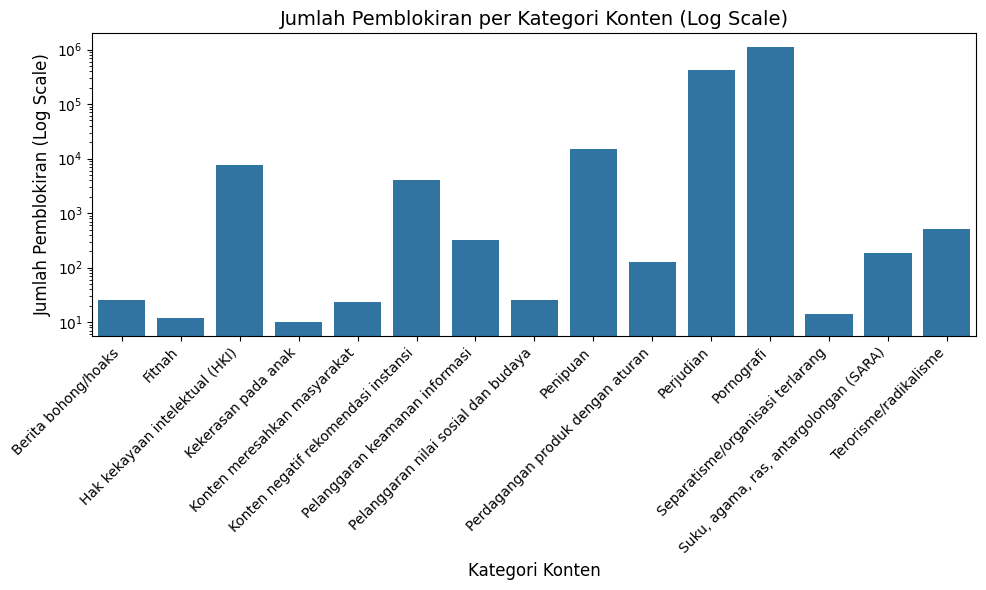

In [ ]:
# Visualisasi dengan skala logaritmik
plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori Konten', y='Jumlah Pemblokiran', data=data_aggregated, errorbar=None)
plt.yscale('log')  # Terapkan skala log
plt.title('Jumlah Pemblokiran per Kategori Konten (Log Scale)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Jumlah Pemblokiran (Log Scale)', fontsize=12)
plt.xlabel('Kategori Konten', fontsize=12)
plt.tight_layout()
plt.show()


Kode ini sederhana tetapi penting untuk menghitung jumlah total pemblokiran dari seluruh kategori konten. Informasi ini berguna untuk memahami skala keseluruhan data dan sebagai dasar untuk analisis statistik atau visualisasi selanjutnya.

In [ ]:
# Tampilkan jumlah total pemblokiran
total_pemblokiran = data_aggregated['Jumlah Pemblokiran'].sum()
print(f"Total Jumlah Pemblokiran: {total_pemblokiran}")




Total Jumlah Pemblokiran: 1558736


Kode ini menyiapkan data numerik dan melakukan normalisasi menggunakan StandardScaler agar data siap digunakan dalam algoritma clustering seperti K-Means. Normalisasi memastikan bahwa semua fitur berkontribusi setara, menghindari bias dalam pengelompokan.

In [ ]:
# Step 5: Preprocessing for clustering
print("\nStep 5: Preprocessing for Clustering")
data_numeric = data_aggregated[['Jumlah Pemblokiran']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
print("Data normalized successfully.")


Step 5: Preprocessing for Clustering
Data normalized successfully.


Kode ini menentukan jumlah cluster optimal menggunakan Elbow Method, dengan membuat Elbow Curve yang mengilustrasikan bagaimana inertia menurun seiring bertambahnya cluster. Titik siku pada grafik menentukan jumlah cluster terbaik untuk digunakan dalam proses K-Means clustering.










Step 6: Determining Optimal Number of Clusters


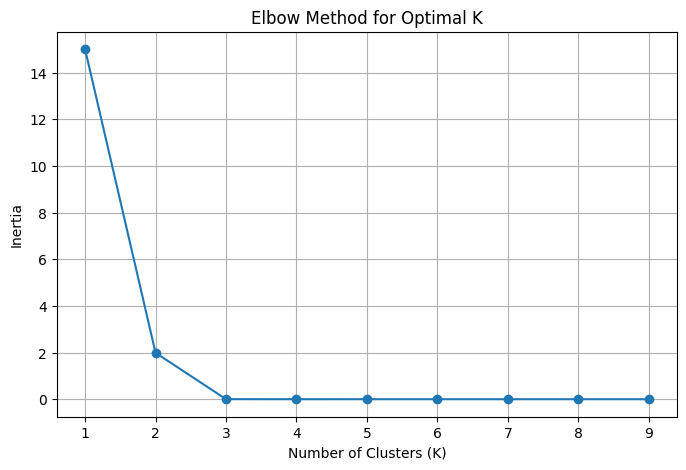

In [ ]:
# Step 6: Determine the optimal number of clusters using the Elbow Method
print("\nStep 6: Determining Optimal Number of Clusters")
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


Pada langkah ini, algoritma K-Means diterapkan untuk membagi data ke dalam jumlah cluster yang optimal (dalam hal ini, 3 cluster). Label cluster yang dihasilkan kemudian ditambahkan ke dalam dataset untuk analisis lanjutan. Ini memungkinkan kita untuk melihat pemblokiran yang terjadi dalam kategori-kategori konten yang berbeda dan bagaimana mereka dikelompokkan berdasarkan karakteristik pemblokiran.

In [ ]:
# Step 7: Apply K-Means Clustering
print("\nStep 7: Applying K-Means Clustering")
k_optimal = 3  # Adjust this based on the elbow point
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(data_scaled)

# Add the cluster labels to the aggregated dataset
data_aggregated['Cluster'] = kmeans.labels_
print("K-Means clustering applied successfully.")



Step 7: Applying K-Means Clustering
K-Means clustering applied successfully.


Kode ini menggunakan algoritma K-Means untuk mengelompokkan data ke dalam 3 cluster berdasarkan Jumlah Pemblokiran.

Hasilnya adalah dataset yang sudah ditambahkan dengan label cluster, yang akan mempermudah analisis lebih lanjut untuk memahami bagaimana kategori konten dikelompokkan berdasarkan perilaku pemblokiran.

In [ ]:
# Clustering dengan jumlah cluster optimal
k_optimal = 3  # Sesuaikan berdasarkan elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
data_aggregated['Cluster'] = kmeans.fit_predict(data_scaled)


Kode ini berfungsi untuk memastikan bahwa DataFrame data_aggregated memiliki struktur yang benar dan kolom-kolom yang diinginkan, serta untuk memastikan bahwa kolom 'Cluster' telah ditambahkan setelah proses K-Means.

In [ ]:
print(data_aggregated.columns)


Index(['Kategori Konten', 'No.', 'Jumlah Pemblokiran', 'Cluster', 'Persentase',
       'Jumlah Pemblokiran (Normalisasi)'],
      dtype='object')


Kode ini menambahkan kolom 'Persentase' yang menghitung kontribusi relatif setiap kategori konten terhadap total jumlah pemblokiran, dan kemudian menampilkan hasilnya. Ini memberikan informasi yang lebih jelas tentang bagaimana distribusi pemblokiran antara kategori konten yang berbeda.









In [ ]:
# Tambahkan kolom 'Persentase'
total_pemblokiran = data_aggregated['Jumlah Pemblokiran'].sum()
data_aggregated['Persentase'] = data_aggregated['Jumlah Pemblokiran'] / total_pemblokiran * 100

print(data_aggregated[['Kategori Konten', 'Jumlah Pemblokiran', 'Persentase']])


                           Kategori Konten  Jumlah Pemblokiran  Persentase
0                      Berita bohong/hoaks                  26    0.001668
1                                   Fitnah                  12    0.000770
2           Hak kekayaan intelektual (HKI)                7660    0.491424
3                      Kekerasan pada anak                  10    0.000642
4             Konten meresahkan masyarakat                  23    0.001476
5      Konten negatif rekomendasi instansi                4058    0.260339
6           Pelanggaran keamanan informasi                 325    0.020850
7      Pelanggaran nilai sosial dan budaya                  26    0.001668
8                                 Penipuan               14757    0.946729
9         Perdagangan produk dengan aturan                 128    0.008212
10                               Perjudian              423453   27.166435
11                              Pornografi             1107547   71.054175
12        Separatisme/org

Kode ini digunakan untuk menghitung dan menampilkan jumlah total pemblokiran yang ada di setiap cluster yang telah dihasilkan oleh algoritma K-Means Clustering. Ini memberikan gambaran yang lebih mendalam tentang distribusi pemblokiran di antara cluster yang berbeda.









In [ ]:
print(data_aggregated.groupby('Cluster')['Jumlah Pemblokiran'].sum())


Cluster
0      27736
1    1107547
2     423453
Name: Jumlah Pemblokiran, dtype: int64


Kode ini menghasilkan grafik batang (barplot) yang menggambarkan total jumlah pemblokiran yang terjadi di setiap cluster, dengan skala y menggunakan skala logaritmik.


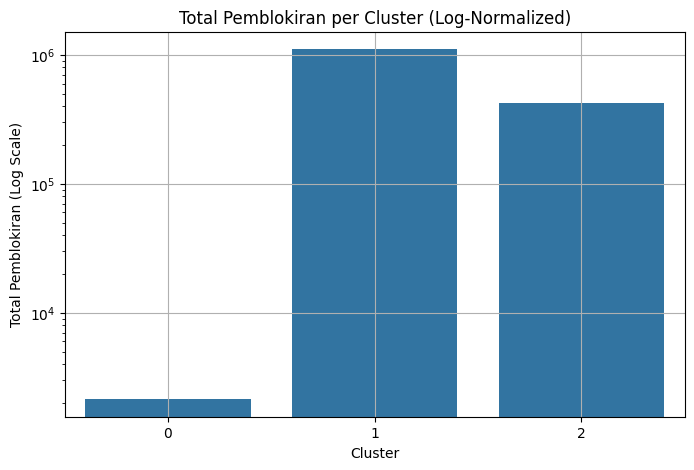

In [ ]:
# Visualisasi total pemblokiran berdasarkan cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Jumlah Pemblokiran', data=data_aggregated, errorbar=None) # Changed y to 'Jumlah Pemblokiran'
plt.title('Total Pemblokiran per Cluster (Log-Normalized)')
plt.xlabel('Cluster')
plt.ylabel('Total Pemblokiran (Log Scale)')
plt.yscale('log') # Apply log scale to the y-axis
plt.grid()
plt.show()



Kode ini menghasilkan pie chart yang menunjukkan persentase pemblokiran untuk setiap cluster yang dihasilkan oleh algoritma K-Means. Setiap potongan pie chart mewakili satu cluster, dan ukuran potongan tersebut menunjukkan persentase total pemblokiran yang terkait dengan cluster tersebut.

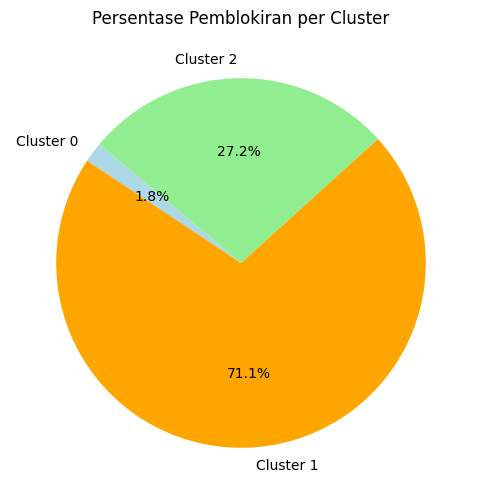

In [ ]:
# Visualisasi Pie Chart untuk Persentase Tiap Cluster
cluster_summary = data_aggregated.groupby('Cluster')['Persentase'].sum()
labels = [f'Cluster {i}' for i in cluster_summary.index]

plt.figure(figsize=(8, 6))
plt.pie(cluster_summary, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'lightgreen'])
plt.title('Persentase Pemblokiran per Cluster')
plt.show()


Kode ini akan menghasilkan nilai Silhouette Score yang menunjukkan kualitas clustering yang telah dilakukan.

Jika hasil Silhouette Score mendekati 1, itu berarti model clustering yang dilakukan dengan K-Means memiliki hasil yang baik, dan data dalam setiap cluster sangat terpisah dengan baik dari cluster lainnya.
Jika nilai Silhouette Score mendekati 0, itu menunjukkan bahwa data berada di dekat perbatasan antara dua cluster, yang menandakan bahwa clustering yang dilakukan mungkin kurang jelas.
Nilai negatif menandakan bahwa beberapa data mungkin berada di cluster yang salah, yaitu lebih dekat dengan cluster lain daripada dengan cluster yang diberikan.

In [ ]:
from sklearn.metrics import silhouette_score

# Hitung silhouette score
silhouette_avg = silhouette_score(data_scaled, data_aggregated['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.859
